## AMATH797 PSet2 David Lieberman

In [0]:
#from google.colab import drive
import os
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.decomposition import KernelPCA
from sklearn.kernel_approximation import Nystroem
np.random.seed(0)

import matplotlib.pyplot as plt
from matplotlib import offsetbox
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
%matplotlib inline

#drive.mount('/content/drive')
#cd 'drive/My Drive/2020S_AMATH797/PSet2'
os.chdir(os.path.expanduser(os.sep.join(["~","Desktop","Homework Scans","2020S_AMATH797","PSet2"])))

## Problem 3

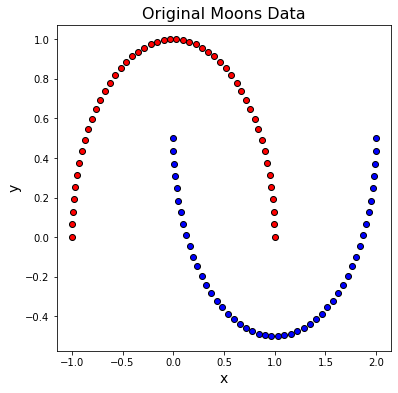

In [0]:
X, y = datasets.make_moons(n_samples=100)
left = y == 0
right = y == 1

plt.figure(figsize=(6, 6))
plt.scatter(X[left, 0], X[left, 1], c="red", edgecolor='k')
plt.scatter(X[right, 0], X[right, 1], c="blue", edgecolor='k')
plt.title("Original Moons Data", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.show()

Text(0, 0.5, 'PC 2')

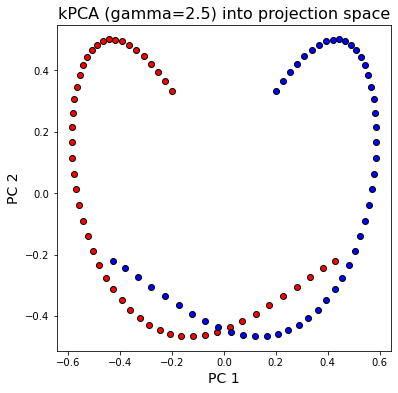

In [0]:
kpca2_5 = KernelPCA(kernel="rbf", gamma=2.5)
X_kpca2_5 = kpca2_5.fit_transform(X)

plt.figure(figsize=(6, 6))
plt.scatter(X_kpca2_5[left, 0], X_kpca2_5[left, 1], c="red", edgecolor='k')
plt.scatter(X_kpca2_5[right, 0], X_kpca2_5[right, 1], c="blue", edgecolor='k')
plt.title("kPCA (gamma=2.5) into projection space", fontsize=16)
plt.xlabel("PC 1", fontsize=14)
plt.ylabel("PC 2", fontsize=14)

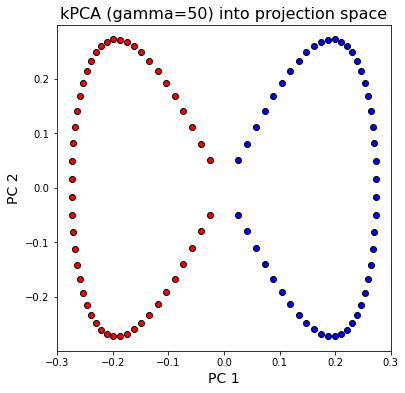

In [0]:
kpca50 = KernelPCA(kernel="rbf", gamma=50)
X_kpca50 = kpca50.fit_transform(X)

plt.figure(figsize=(6, 6))
plt.scatter(X_kpca50[left, 0], X_kpca50[left, 1], c="red", edgecolor='k')
plt.scatter(X_kpca50[right, 0], X_kpca50[right, 1], c="blue", edgecolor='k')
plt.title("kPCA (gamma=50) into projection space", fontsize=16)
plt.xlabel("PC 1", fontsize=14)
plt.ylabel("PC 2", fontsize=14)
plt.show()

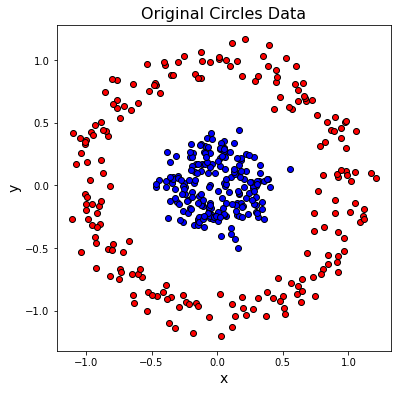

In [0]:
X, y = datasets.make_circles(n_samples=400, factor = 0.25, noise=0.1)
reds = y == 0
blues = y == 1

plt.figure(figsize=(6, 6))
plt.scatter(X[reds, 0], X[reds, 1], c="red", edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue", edgecolor='k')
plt.title("Original Circles Data", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.show()

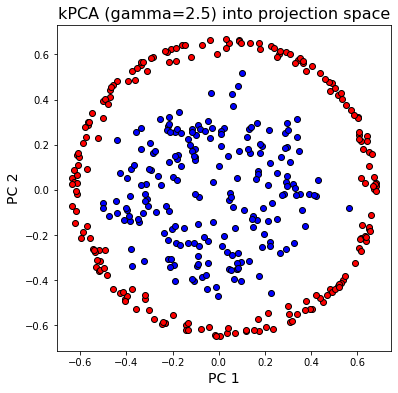

In [0]:
kpca2_5 = KernelPCA(kernel="rbf", gamma=1)
X_kpca2_5 = kpca2_5.fit_transform(X)

plt.figure(figsize=(6, 6))
plt.scatter(X_kpca2_5[reds, 0], X_kpca2_5[reds, 1], c="red", edgecolor='k')
plt.scatter(X_kpca2_5[blues, 0], X_kpca2_5[blues, 1], c="blue", edgecolor='k')
plt.title("kPCA (gamma=2.5) into projection space", fontsize=16)
plt.xlabel("PC 1", fontsize=14)
plt.ylabel("PC 2", fontsize=14)
plt.show()

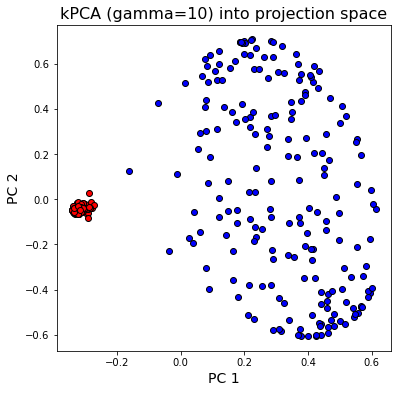

In [0]:
kpca10 = KernelPCA(kernel="rbf", gamma=10)
X_kpca10 = kpca10.fit_transform(X)

plt.figure(figsize=(6, 6))
plt.scatter(X_kpca10[reds, 0], X_kpca10[reds, 1], c="red", edgecolor='k')
plt.scatter(X_kpca10[blues, 0], X_kpca10[blues, 1], c="blue", edgecolor='k')
plt.title("kPCA (gamma=10) into projection space", fontsize=16)
plt.xlabel("PC 1", fontsize=14)
plt.ylabel("PC 2", fontsize=14)
plt.show()

We want to choose the optimal parameter gamma (defined in the sklearn library for RBF/Gaussian kernels as 1/sd). This choice of gamma thus dictates the bandwidth of our kernel method. Too small a bandwidth (for the moon and circle datasets, around 2.5 for example) and the kernel on each data becomes a "spike," which quickly decays, isolating it from neighboring points and losing the underlying clustered structure of the data. Too large a bandwidth and points in distinct clusters begin to blend together, likewise negating the underlying clustered structure of the data. An intermediate valued bandwidth (like gamma = 10 for the circles dataset) is necessary for kPCA to be effective in transforming the data such that it retains structre while clusters become linearly seperable in the higher dimensional subspace.

## Problem 4

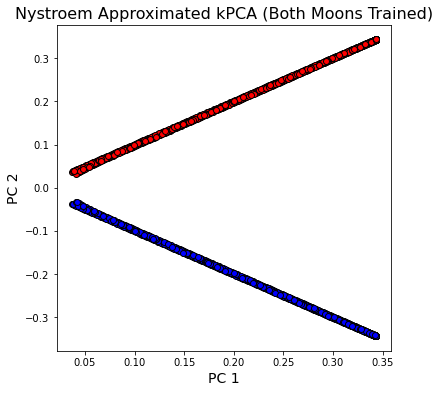

In [0]:
X, y = datasets.make_moons(n_samples=2000)
left = y == 0
right = y == 1

feature_map_nystroem = Nystroem(gamma=20, n_components=500)
data_transformed = feature_map_nystroem.fit_transform(X)
U, S, Vt = np.linalg.svd(data_transformed, full_matrices=True)
alphas = U[:,:2]
lambdas = S[:2]

X_transform = alphas * lambdas

plt.figure(figsize=(6, 6))
plt.scatter(X_transform[left, 0], X_transform[left, 1], c="red", edgecolor='k')
plt.scatter(X_transform[right, 0], X_transform[right, 1], c="blue", edgecolor='k')
plt.title("Nystroem Approximated kPCA (Both Moons Trained)", fontsize=16)
plt.xlabel("PC 1", fontsize=14)
plt.ylabel("PC 2", fontsize=14)
plt.show()

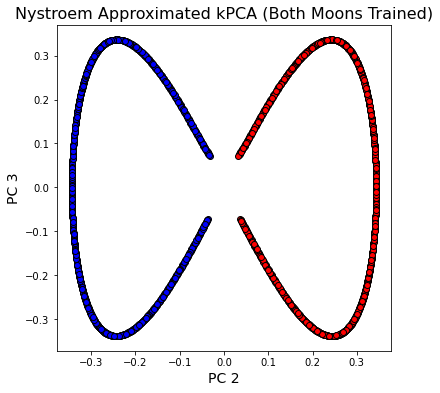

First 4 singular values: [11.18142217 11.18052842 10.99372778 10.99370312]


In [0]:
alphas = U[:,1:3]
lambdas = S[1:3]

X_transform = alphas * lambdas

plt.figure(figsize=(6, 6))
plt.scatter(X_transform[left, 0], X_transform[left, 1], c="red", edgecolor='k')
plt.scatter(X_transform[right, 0], X_transform[right, 1], c="blue", edgecolor='k')
plt.title("Nystroem Approximated kPCA (Both Moons Trained)", fontsize=16)
plt.xlabel("PC 2", fontsize=14)
plt.ylabel("PC 3", fontsize=14)
plt.show()
print("First 4 singular values:", S[:4])

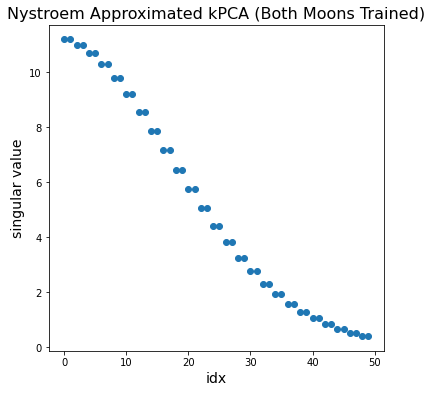

In [0]:
plt.figure(figsize=(6, 6))
plt.scatter(np.arange(50), S[:50])
plt.title("Nystroem Approximated kPCA (Both Moons Trained)", fontsize=16)
plt.xlabel("idx", fontsize=14)
plt.ylabel("singular value", fontsize=14)
plt.show()

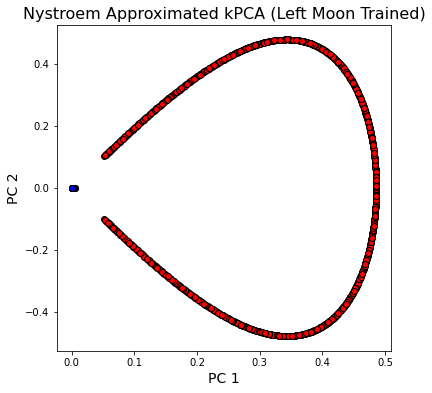

In [0]:
X, y = datasets.make_moons(n_samples=2000)
ysort = y.argsort()
sorted_y = y[ysort]
sorted_X = X[ysort]

left = sorted_y == 0
right = sorted_y == 1

nystroem = Nystroem(gamma=20, n_components=500).fit(sorted_X[:500])
data_transformed = nystroem.transform(sorted_X)
U, S, Vt = np.linalg.svd(data_transformed, full_matrices=True)
alphas = U[:,:2]
lambdas = S[:2]
X_transform = alphas * lambdas

plt.figure(figsize=(6, 6))
plt.scatter(X_transform[left, 0], X_transform[left, 1], c="red", edgecolor='k')
plt.scatter(X_transform[right, 0], X_transform[right, 1], c="blue", edgecolor='k')
plt.title("Nystroem Approximated kPCA (Left Moon Trained)", fontsize=16)
plt.xlabel("PC 1", fontsize=14)
plt.ylabel("PC 2", fontsize=14)
plt.show()

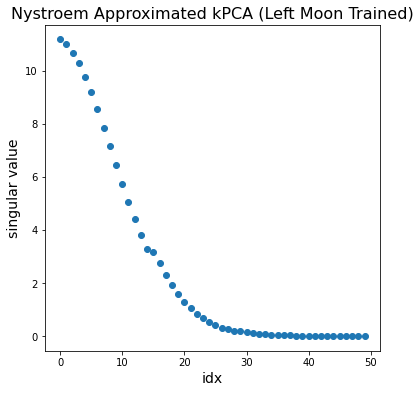

In [0]:
plt.figure(figsize=(6, 6))
plt.scatter(np.arange(50), S[:50])
plt.title("Nystroem Approximated kPCA (Left Moon Trained)", fontsize=16)
plt.xlabel("idx", fontsize=14)
plt.ylabel("singular value", fontsize=14)
plt.show()

**Two Moons, Full:** Interestingly the plot of principal components #1 and #2 we get for the approximate kernel matrix obtained via Nystroem, is quite different than for the full kernel matrix; while conversely, the plot of principal components #2 and #3 is almost identical. Upon inspecting a plot of the spectrum, we see that all singular/eigenvalues are obtained in pairs (as expected). Nonetheless, in the PC #1 & #2 plot, we obtain good seperation along PC #2, in the form of a linear subspace that seperates the two clusters. Nystroem has proven to be effective.

**Two Moons, Left Only:** Building the Nystroem approximated kernel matrix by sampling data only from the left moons, Nystroem is not able to appreciably account for the geometry of the data for the right moon. The right moon data get all compressed down to the origin, while the left moon data, for the most part, retains its geometry (as observed above). Moreover, inspecting the spectrum, we see that the sigular/eigenvalues no longer come in pairs; another indication that this selective sampling has disrupted the underlying relationship in our data.